In [54]:
import requests, openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bs4
from bs4 import BeautifulSoup

In [33]:
excel = openpyxl.Workbook()
print(excel.sheetnames)
sheet = excel.active
sheet.title = 'Top Rated Movies'
print(excel.sheetnames)
sheet.append(['Movie Name','Year','IMDb Rating'])

try:
    source = requests.get('https://www.imdb.com/chart/moviemeter/?ref_=nv_mv_mpm')
    source.raise_for_status()
    soup = BeautifulSoup(source.text,'html.parser')
    movies = soup.find('tbody',class_ = 'lister-list').find_all('tr')
    for movie in movies:
        name = movie.find('td', class_='titleColumn').a.text
        #rank = movie.find('td', class_='titleColumn').get_text(strip=True).strip('()').split(' ')
        year = movie.find('td', class_='titleColumn').span.text.strip('()')
        rating = movie.find('td', class_='ratingColumn imdbRating').text.strip('\n')
        print(name,year,rating)
        sheet.append([name,year,rating])
    
except Exception as e:
    print(e)
excel.save('IMDb Movies.xlsx')

['Sheet']
['Top Rated Movies']
Black Adam 2022 7.1
Halloween Ends 2022 5.0
Terrifier 2 2022 6.6
The School for Good and Evil 2022 5.9
Smile 2022 6.9
Luckiest Girl Alive 2022 6.4
Creed III 2023 
Terrifier 2016 5.6
Bullet Train 2022 7.3
The Curse of Bridge Hollow 2022 5.6
Hellraiser 2022 6.0
The Stranger 2022 6.6
Hocus Pocus 1993 6.9
Amsterdam 2022 6.2
Hocus Pocus 2 2022 6.1
X 2022 6.6
Kantara 2022 9.3
Black Panther: Wakanda Forever 2022 
Don't Worry Darling 2022 6.2
Halloween 1978 7.7
Rosaline 2022 6.4
Top Gun: Maverick 2022 8.4
Blonde 2022 5.5
The Banshees of Inisherin 2022 8.3
Ticket to Paradise 2022 6.4
Blackout 2022 3.8
Mr. Harrigan's Phone 2022 6.0
Spirited 2022 
Pearl 2022 7.2
Triangle of Sadness 2022 7.9
Bros 2022 6.4
The Woman King 2022 6.7
Barbarian 2022 7.5
Halloween Kills 2021 5.5
Watcher 2022 6.3
Halloween 2018 6.5
Everything Everywhere All at Once 2022 8.1
Thor: Love and Thunder 2022 6.4
The Northman 2022 7.1
Fall 2022 6.4
Harry Potter and the Sorcerer's Stone 2001 7.6
The 

In [44]:
df = pd.read_excel(r'C:\Users\muhda\Downloads\pythonproject\IMDb Movies.xlsx')
print(df)

                      Movie Name  Year  IMDb Rating
0                     Black Adam  2022          7.1
1                 Halloween Ends  2022          5.0
2                    Terrifier 2  2022          6.6
3   The School for Good and Evil  2022          5.9
4                          Smile  2022          6.9
..                           ...   ...          ...
95        Catherine Called Birdy  2022          6.5
96               Last Seen Alive  2022          5.6
97             Significant Other  2022          5.7
98                  Gisaengchung  2019          8.5
99                  The Gray Man  2022          6.5

[100 rows x 3 columns]


In [45]:
df.dtypes

Movie Name      object
Year             int64
IMDb Rating    float64
dtype: object

In [46]:
df[(df['IMDb Rating'] >= 9.0) & (df.Year == 2022)]

,Movie Name,Year,IMDb Rating
16,Kantara,2022,9.3
55,The Legend of Maula Jatt,2022,9.0


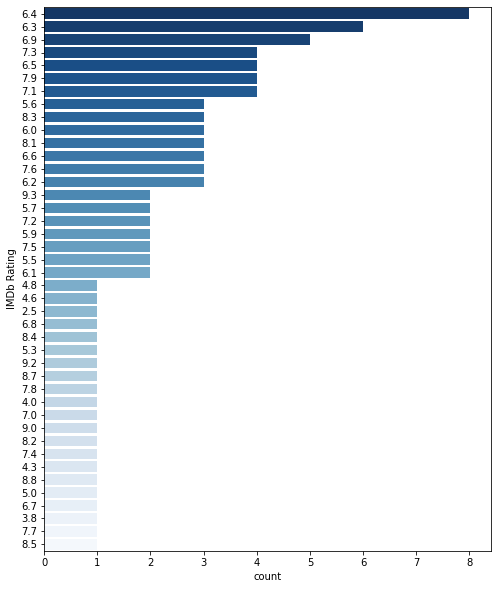

In [61]:
plt.figure(figsize=(8,10))
sns.countplot(y="IMDb Rating", data=df,label="Number of cars by brand",palette='Blues_r',order=df['IMDb Rating'].value_counts().index)
plt.show()